In [1]:
from iertools.read import read_sql
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
f = "../osm/casa/run/eplusout.sql"
casa = read_sql(f)
nombres = casa.rename_from_sql()
casa.rename(columns=nombres)
data = casa.data.loc["2006"].copy()
# data = casa.data
del data[":Electricity:Facility (J)"]
del data["Z1:Zone Air Relative Humidity (%)"]
del data["Z1:Zone Air Temperature (C)"]


# Acotamos el mes cr'itico

array([<AxesSubplot:xlabel='date'>, <AxesSubplot:xlabel='date'>],
      dtype=object)

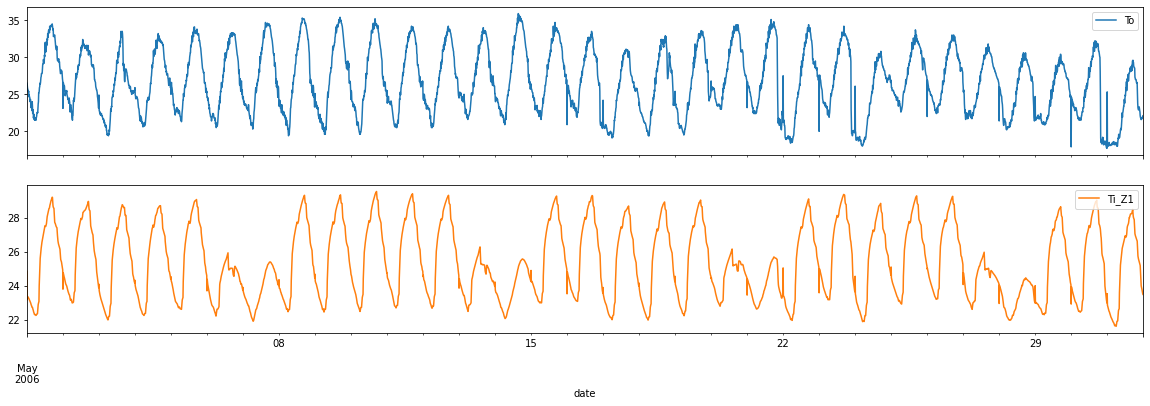

In [3]:
data = data.loc["2006-05"]
data.plot(subplots=True,figsize = (20,6))

# Calculamos lo necesario para los grados hora

To_promedio y la T_n

$T_n = 0.54\overline{T_o} + 13.5 ^oC $ 


y definimos $\Delta T_n $

In [4]:
data["To_a"]    =  data.To.mean()
data["Tn"]      = data.To_a * 0.54 + 13.5
data["DeltaTn"] = 1.5 
data

variable_name,To,Ti_Z1,To_a,Tn,DeltaTn
date,,,,,
2006-05-01 00:00:00,26.5,24.855669,26.746623,27.943176,1.5
2006-05-01 00:10:00,26.3,23.173359,26.746623,27.943176,1.5
2006-05-01 00:20:00,25.9,23.329834,26.746623,27.943176,1.5
2006-05-01 00:30:00,25.7,23.366766,26.746623,27.943176,1.5
2006-05-01 00:40:00,25.6,23.344642,26.746623,27.943176,1.5
...,...,...,...,...,...
2006-05-31 23:10:00,21.8,23.790446,26.746623,27.943176,1.5
2006-05-31 23:20:00,21.9,23.693374,26.746623,27.943176,1.5
2006-05-31 23:30:00,21.8,23.606218,26.746623,27.943176,1.5


# grados hora de disconfort c'alido

In [5]:
data.loc[ (data.Ti_Z1 > (data.Tn+data.DeltaTn)),'GHDC'] = data.Ti_Z1 - (  data.Tn + data.DeltaTn) 

In [6]:
data.GHDC.sum()*1/6

0.06008605507961562

# grados hora de disconfort frio

In [7]:
data.loc[ (data.Ti_Z1 < (data.Tn-data.DeltaTn)),'GHDF'] =  (data.Tn - data.DeltaTn)  - data.Ti_Z1

In [8]:
data.GHDF.sum()*1/6

1187.401667155547

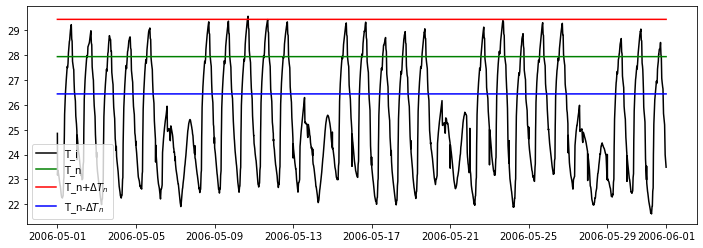

In [9]:
fig, ax = plt.subplots(figsize=(12,4))


ax.plot(data.Ti_Z1,'k-',label="T_i")
ax.plot(data.Tn,'g-',label="T_n")
ax.plot(data.Tn+data.DeltaTn,'r-',label="T_n+$\Delta T_n$")
ax.plot(data.Tn-data.DeltaTn,'b-',label="T_n-$\Delta T_n$")

ax.legend()